# Episode 3: advanced layer types

## 1. Formulate / Outline the problem: Image classification
Goal: predict the category of an image

These are the images:
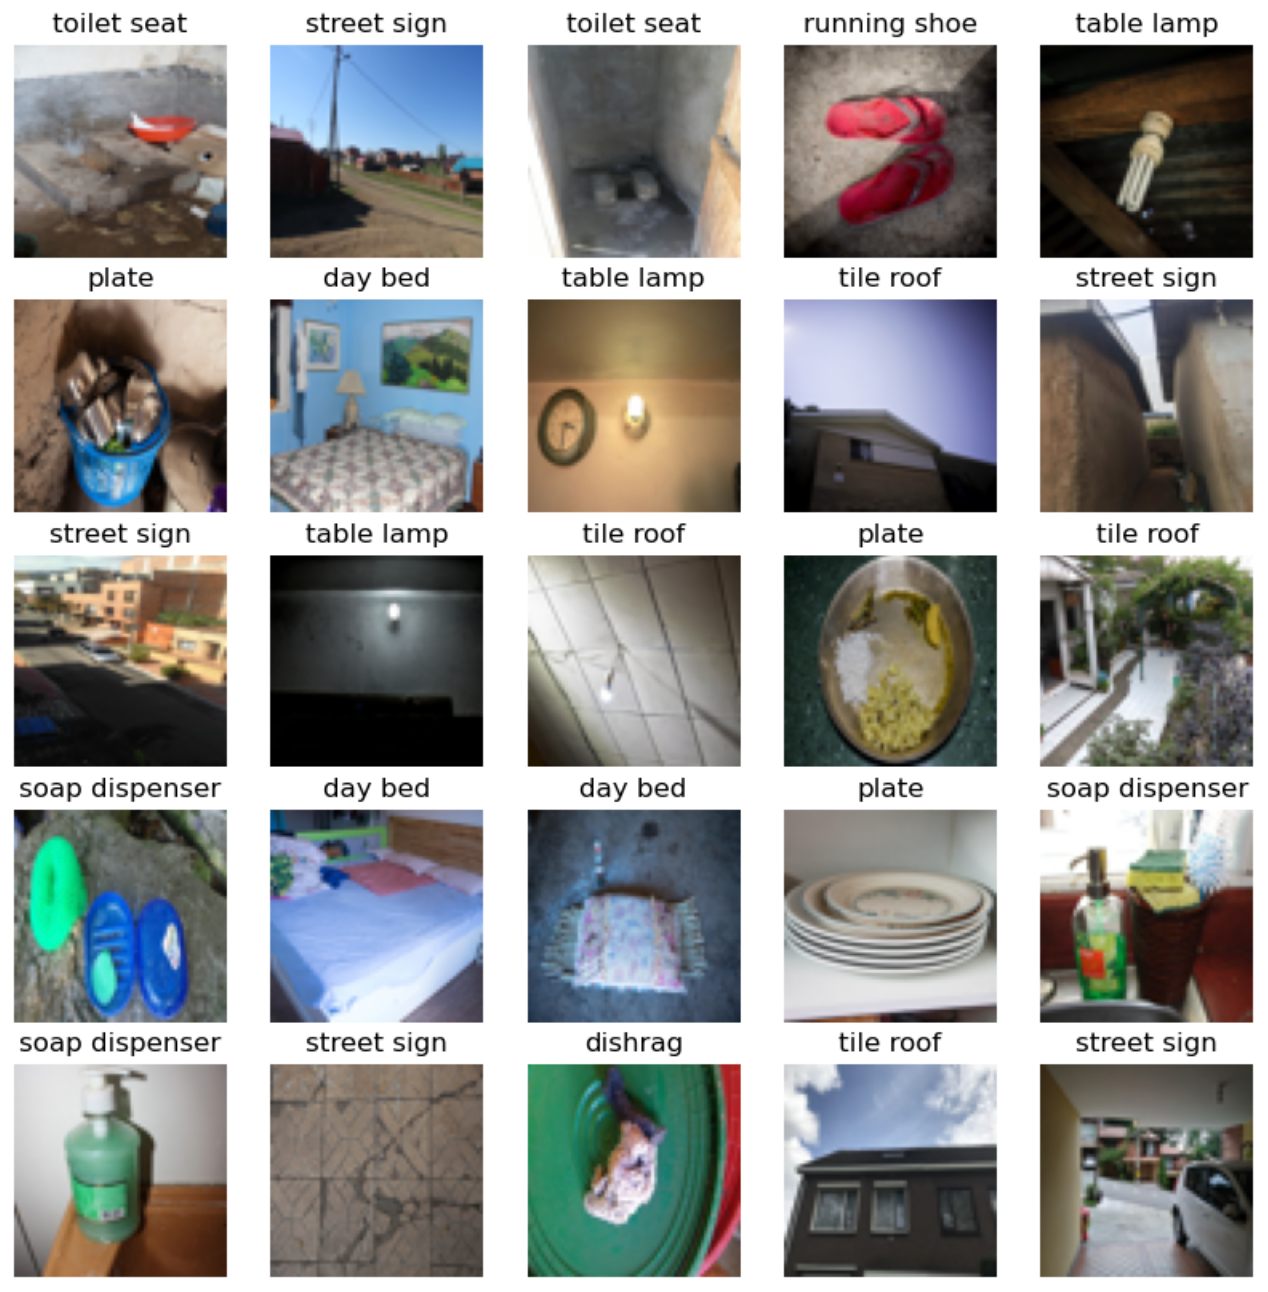

These are the categories that we have to predict:
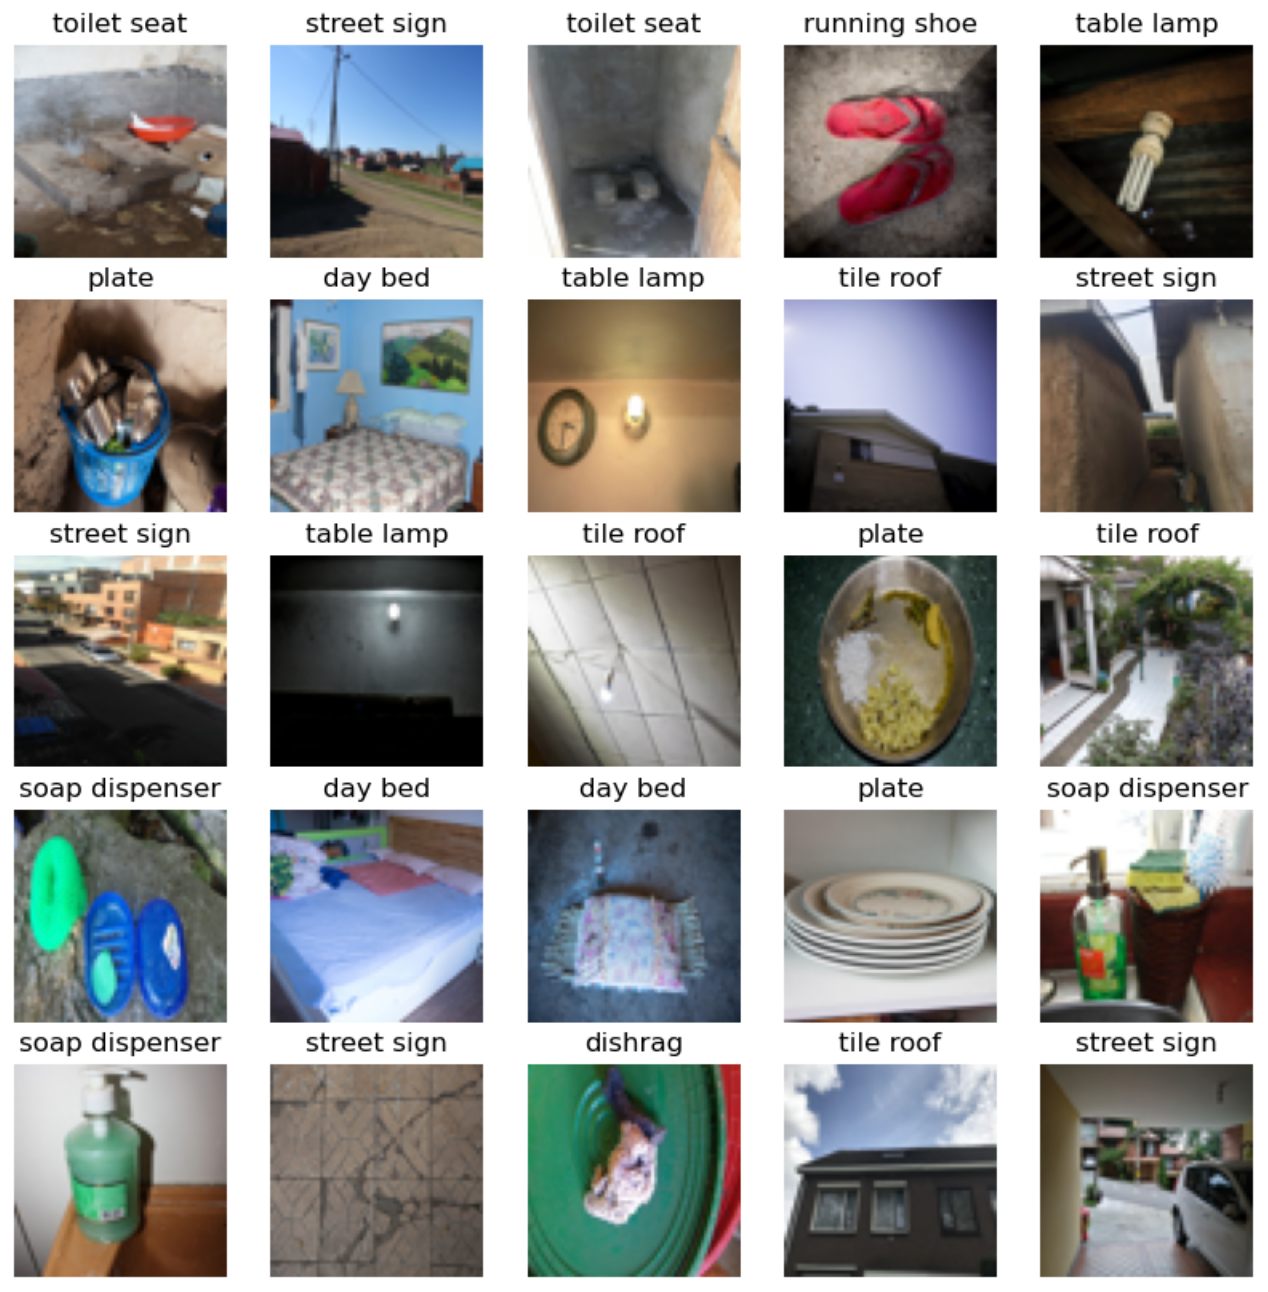

## 2. Identify inputs and outputs

In [1]:
import pathlib
import numpy as np

In [2]:
DATA_FOLDER = pathlib.Path('data/dollarstreet/')

In [3]:
train_images = np.load(DATA_FOLDER / 'train_images.npy')

In [4]:
val_images = np.load(DATA_FOLDER / 'test_images.npy')

In [5]:
train_labels = np.load(DATA_FOLDER / 'train_labels.npy')

In [6]:
val_labels = np.load(DATA_FOLDER / 'test_labels.npy')

### Explore data

In [7]:
train_images.shape

(878, 64, 64, 3)

In [8]:
train_images.min(), train_images.max()

(np.int32(0), np.int32(255))

In [9]:
train_labels.shape

(878,)

In [10]:
train_labels.min(), train_labels.max()

(np.int64(0), np.int64(9))

## 3. Prepare data

In [11]:
train_images = train_images / 255.0
val_images = val_images / 255.0

## 4. Choose a pretrained model or train from scratch

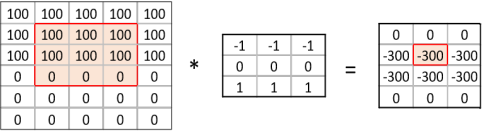

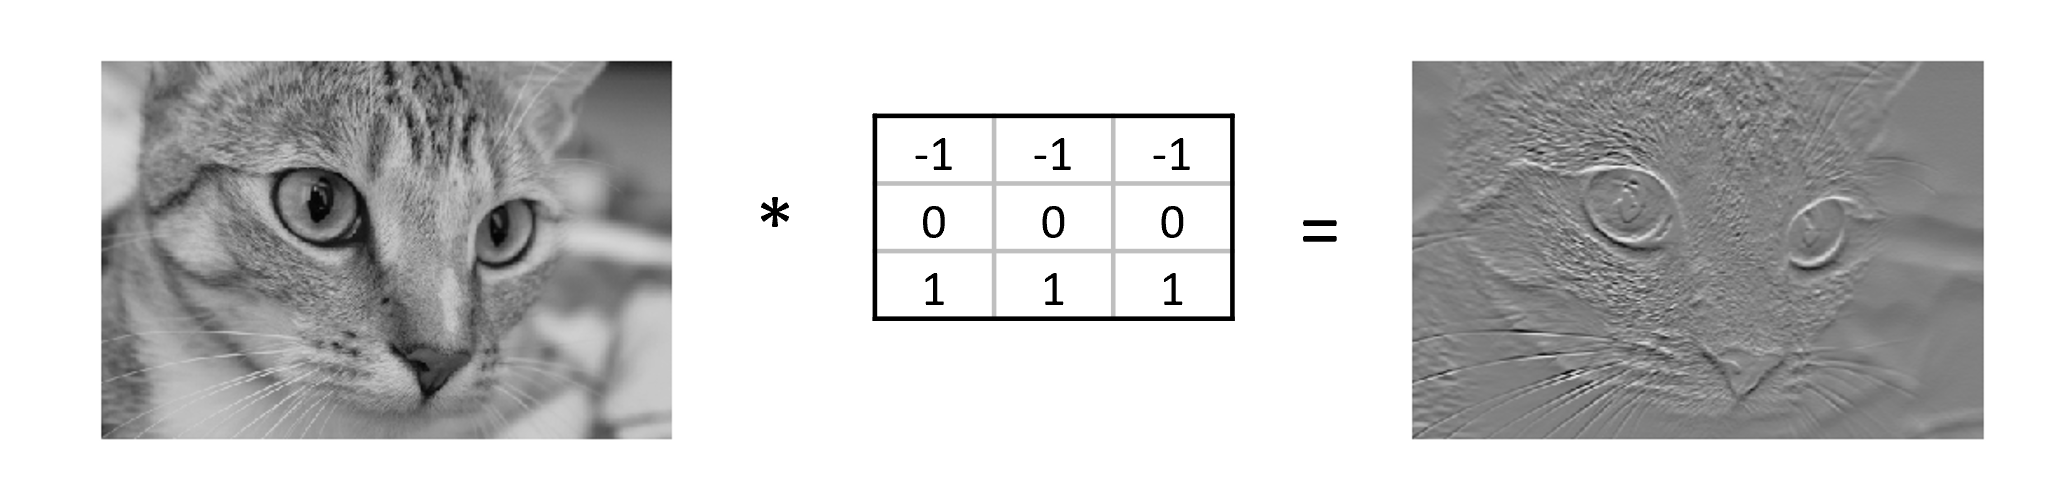

In [12]:
from tensorflow import keras

In [13]:
inputs = keras.Input(shape=train_images.shape[1:])

x = keras.layers.Conv2D(50, (3, 3), activation="relu")(inputs)
x = keras.layers.Conv2D(50, (3, 3), activation="relu")(x)
x = keras.layers.Flatten()(x)

outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="dollar_street_model_small")

model.summary()


Model: "dollar_street_model_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 180000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │     1,800,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,823,960 (6.96 MB)

 Trainable params: 1,823,960 (6.96 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
def create_nn():
    inputs = keras.Input(shape=train_images.shape[1:])

    x = keras.layers.Conv2D(50, (3, 3), activation="relu")(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation="relu")(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Flatten()(x)
    
    outputs = keras.layers.Dense(10)(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name="dollar_street_model_small")
    
    return model


In [15]:
model = create_nn()
model.summary()

Model: "dollar_street_model_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        98,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,960 (476.41 KB)

 Trainable params: 121,960 (476.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [17]:
compile_model(model)

## 6. Train the model

In [18]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1207 - loss: 2.3234 - val_accuracy: 0.1775 - val_loss: 2.2576
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2216 - loss: 2.1785 - val_accuracy: 0.1980 - val_loss: 2.1733
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3021 - loss: 1.9919 - val_accuracy: 0.2560 - val_loss: 2.0985
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3542 - loss: 1.7842 - val_accuracy: 0.3208 - val_loss: 2.1081
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4653 - loss: 1.6099 - val_accuracy: 0.2935 - val_loss: 2.2041
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4935 - loss: 1.4336 - val_accuracy: 0.2867 - val_loss: 2.1777
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6191 - loss: 1.2114 - val_accuracy: 0.3140 - val_loss: 2.2878
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7220 - loss: 0.9333 - val_accuracy: 0.2833 - v

## 8. Measure performance

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
def plot_history(history, metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metrics")

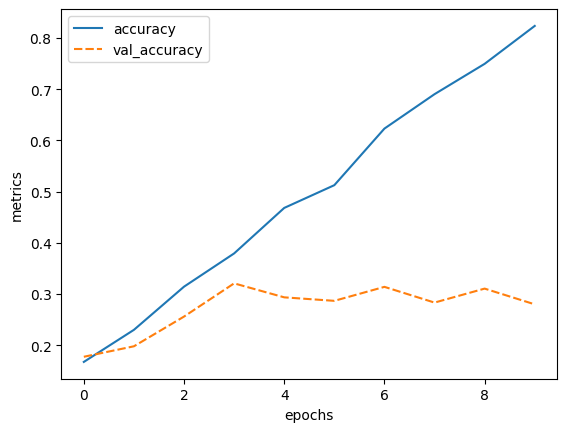

In [21]:
plot_history(history, ['accuracy', 'val_accuracy'])

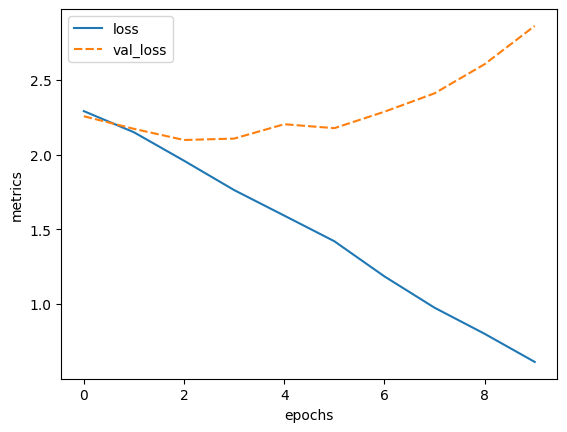

In [22]:
plot_history(history, ['loss', 'val_loss'])

## 9. Refine the model

### Exercise 3.5 Network depth
What, do you think, will be the effect of adding a convolutional layer to your model? Will this model have more or fewer parameters?
Try it out. Create a `model` that has an additional `Conv2d` layer with 50 filters and another MaxPooling2D layer after the last MaxPooling2D layer. Train it for 10 epochs and plot the results.

**HINT**:
The model definition that we used previously needs to be adjusted as follows:
```python
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
# Add your extra layers here
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

In [23]:
def create_nn():
    inputs = keras.Input(shape=train_images.shape[1:])

    x = keras.layers.Conv2D(50, (3, 3), activation="relu")(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation="relu")(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation="relu")(x) # layer added
    x = keras.layers.MaxPooling2D((2, 2))(x) # layer added
    x = keras.layers.Flatten()(x)
    
    outputs = keras.layers.Dense(10)(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name="dollar_street_model_small")
    
    return model

In [24]:
model = create_nn()

In [25]:
model.summary()

Model: "dollar_street_model_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        18,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,510 (251.99 KB)

 Trainable params: 64,510 (251.99 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
compile_model(model)

In [27]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1055 - loss: 2.3069 - val_accuracy: 0.2014 - val_loss: 2.2839
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1899 - loss: 2.2576 - val_accuracy: 0.2355 - val_loss: 2.2300
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2244 - loss: 2.1792 - val_accuracy: 0.2423 - val_loss: 2.1885
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3232 - loss: 2.0341 - val_accuracy: 0.2765 - val_loss: 2.1269
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3233 - loss: 1.8932 - val_accuracy: 0.2287 - val_loss: 2.2135
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3963 - loss: 1.7391 - val_accuracy: 0.2218 - val_loss: 2.1815
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4275 - loss: 1.6600 - val_accuracy: 0.2253 - val_loss: 2.2496
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4693 - loss: 1.5149 - val_accuracy: 0.2526 - v

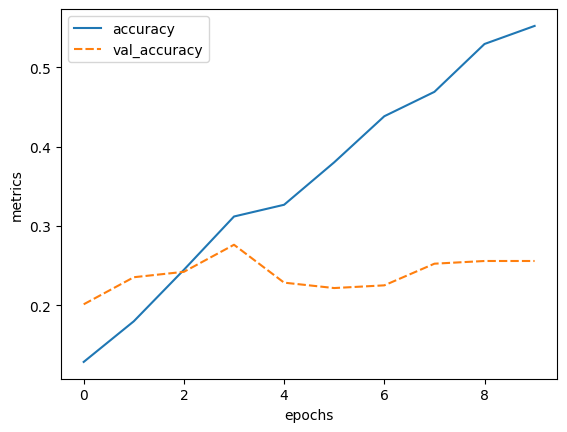

In [28]:
plot_history(history, ['accuracy', 'val_accuracy'])

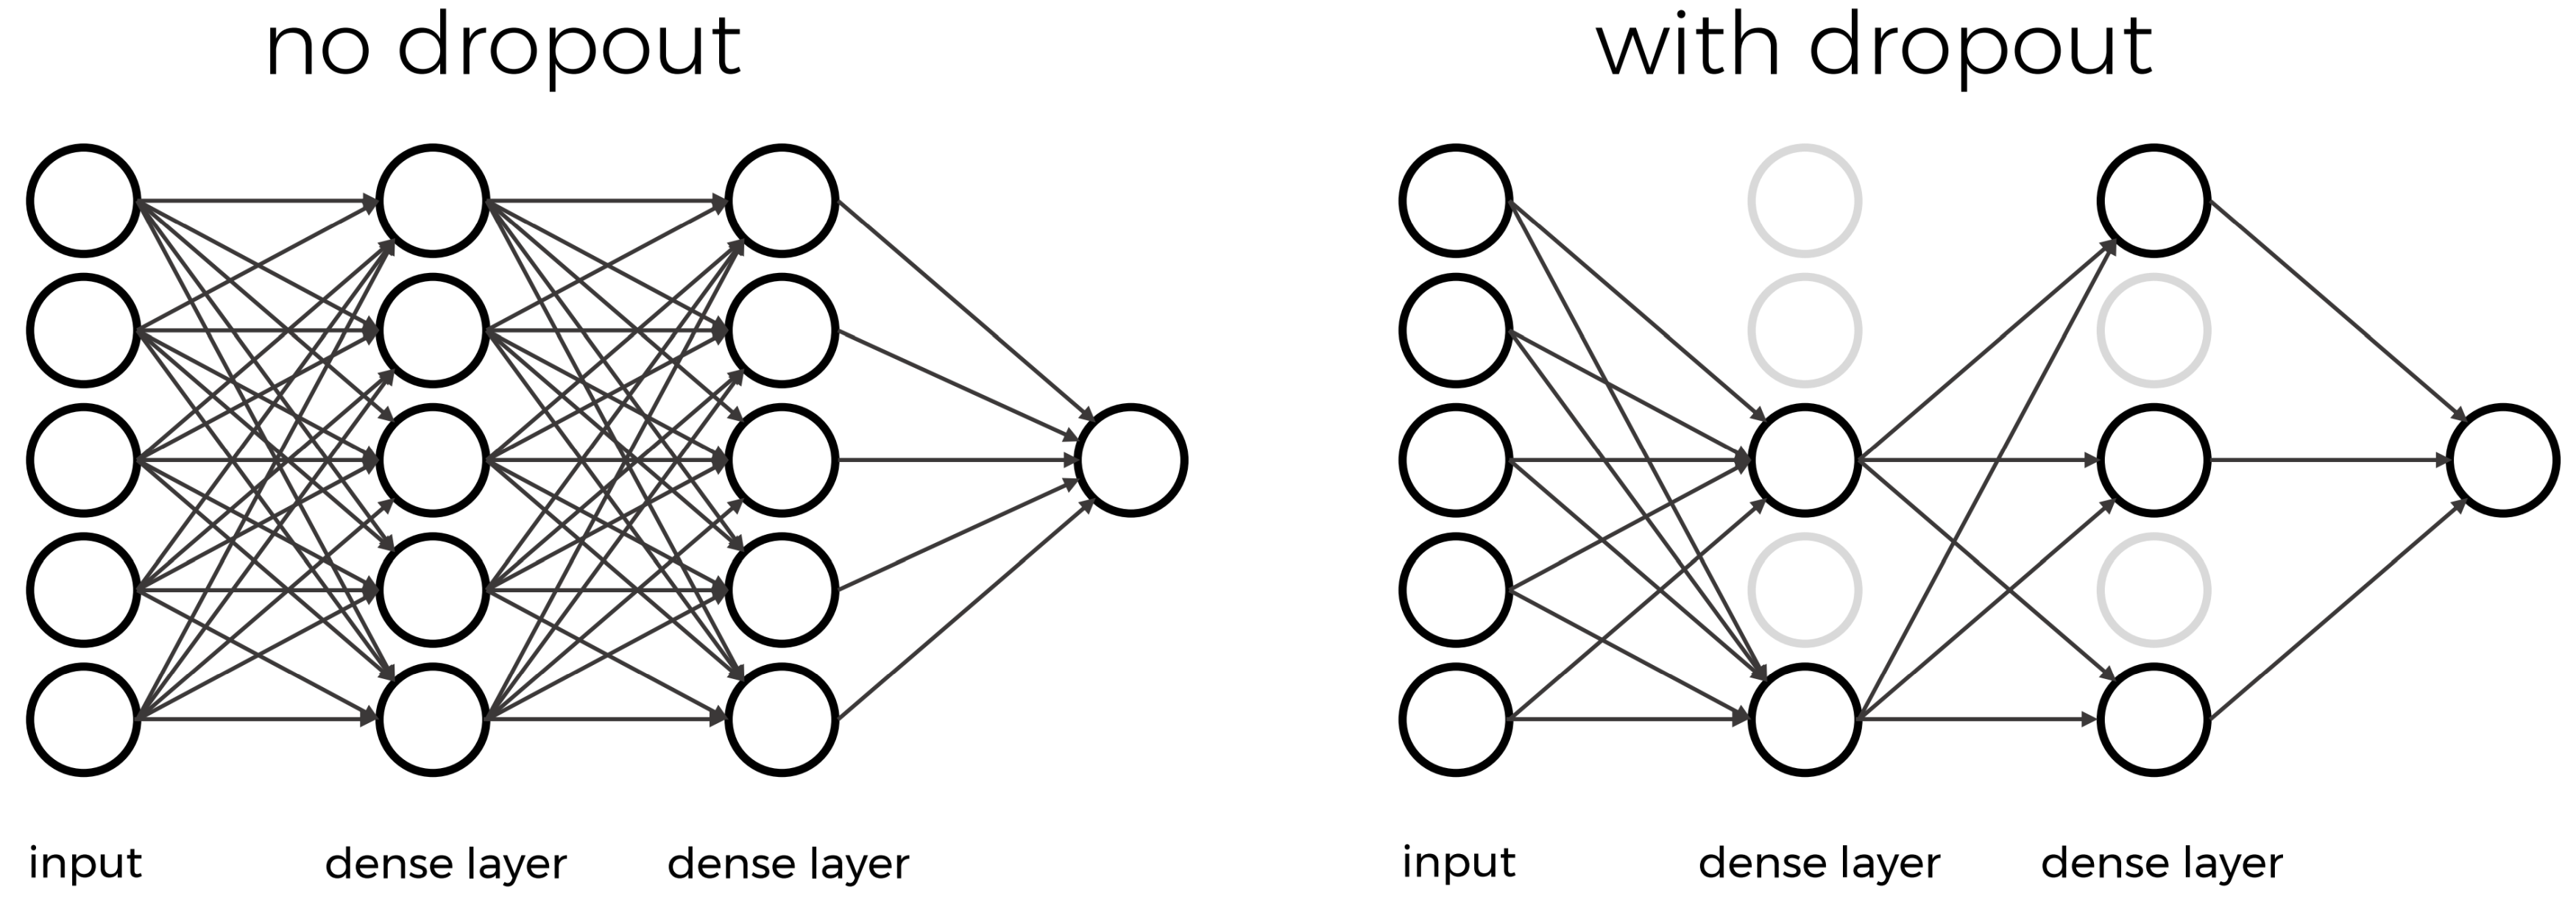

In [29]:
def create_nn_with_dropout(): # changed
    inputs = keras.Input(shape=train_images.shape[1:])

    x = keras.layers.Conv2D(50, (3, 3), activation="relu")(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    
    x = keras.layers.Conv2D(50, (3, 3), activation="relu")(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    
    x = keras.layers.Conv2D(50, (3, 3), activation="relu")(x) # layer added
    x = keras.layers.MaxPooling2D((2, 2))(x) # layer added
    x = keras.layers.Dropout(0.8)(x) # This is new
    
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(10)(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name="dollar_street_model_small")
    
    return model

In [30]:
model = create_nn_with_dropout()

In [31]:
model.summary()

Model: "dollar_street_model_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        18,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,510 (251.99 KB)

 Trainable params: 64,510 (251.99 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
compile_model(model)

In [33]:
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(val_images, val_labels))

Epoch 1/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0912 - loss: 2.3306 - val_accuracy: 0.1399 - val_loss: 2.2963
Epoch 2/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1163 - loss: 2.3016 - val_accuracy: 0.1468 - val_loss: 2.2982
Epoch 3/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1427 - loss: 2.2960 - val_accuracy: 0.1706 - val_loss: 2.2839
Epoch 4/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1462 - loss: 2.2799 - val_accuracy: 0.1331 - val_loss: 2.2821
Epoch 5/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1801 - loss: 2.2393 - val_accuracy: 0.1775 - val_loss: 2.2366
Epoch 6/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2110 - loss: 2.1960 - val_accuracy: 0.1945 - val_loss: 2.2374
Epoch 7/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2154 - loss: 2.1862 - val_accuracy: 0.2082 - val_loss: 2.1994
Epoch 8/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2453 - loss: 2.1284 - val_accuracy: 0.2253 - v

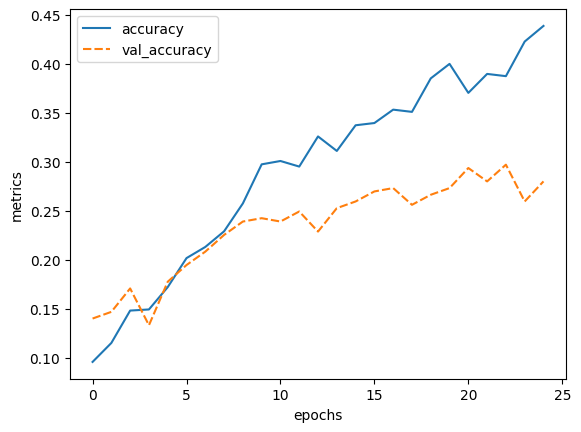

In [34]:
plot_history(history, ['accuracy', 'val_accuracy'])